In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')





In [2]:
full_data = [train, test]
for dataset in full_data:
    display(dataset.head(3))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


PassengerId의 역할과 앞에 인덱스의 역할이 중첩된다고 보여 PassengerId를 삭제하겠습니다.

In [3]:
for dataset in full_data:
    PassengerId = dataset['PassengerId'].values
    dataset.drop(columns = ['PassengerId'], inplace= True)



결석치를 채울지 버릴지를 판단하기 위해 각 csv에 null값이 얼마나 있는지 확인한다


In [4]:
full_data = [train, test]
for dataset in full_data:
    print(dataset.isnull().sum())
    print('----------')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
----------
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64
----------


cabin은 결석치가 너무 많으므로 버리도록 하겠습니다.

In [5]:
for dataset in full_data:
    dataset.drop('Cabin', axis=1, inplace=True)


In [6]:
for dataset in full_data:
    print(dataset.isnull().sum())
    print('----------')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
----------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64
----------


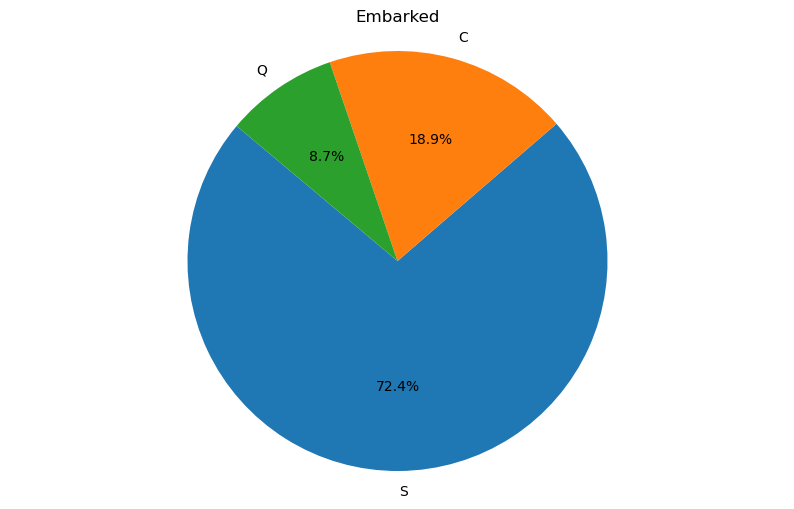

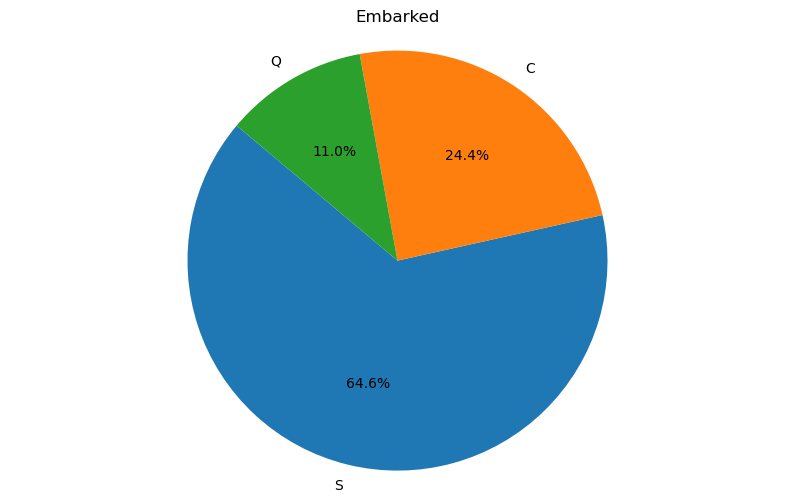

In [7]:
for dataset in full_data:
    embarked_counts = dataset['Embarked'].value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # 원 그래프가 원 형태를 유지하도록 함
    plt.title('Embarked')
    plt.show()


Embarked의 값들중 S가 가장 많으므로 Nan을 S로 채우도록 하겠습니다.

In [8]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [9]:
for dataset in full_data:
    print(dataset.isnull().sum())
    print('----------')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64
----------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64
----------


여행하는 연령층이 있을 거라 생각하므로  age의 최빈값에 +-5를 더한 값들을 Nan에 무작위로 넣도록 하겠습니다.

In [10]:
for dataset in full_data:
    mode_age = dataset['Age'].mode()[0]
    age_nan_indices = dataset['Age'][dataset['Age'].isnull()].index
    for index in age_nan_indices:
        dataset.loc[index, 'Age'] = np.random.randint(mode_age - 5, mode_age + 5)
    

 

    
    

In [11]:
print(dataset['Age'])

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    21.0
414    39.0
415    38.5
416    21.0
417    20.0
Name: Age, Length: 418, dtype: float64


연령대별로 구별하기 편하게 범주화 하겠습니다

In [12]:
for dataset in full_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age']   = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] =4

    # 'Age' 그룹별로 카운트
    age_counts = dataset['Age'].value_counts()
print(len(age_counts))
    # 레이블 리스트 생성


5


보기좋게 원그래프로 시각화 하도록 하겠습니다.

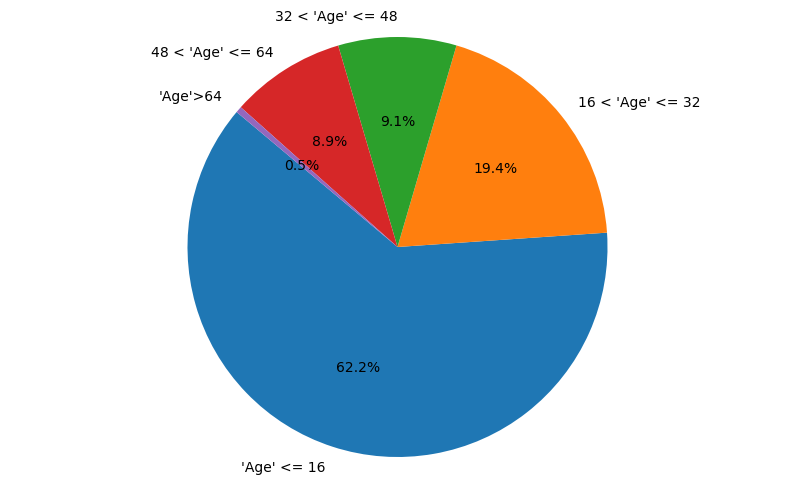

In [13]:
labels = ["'Age' <= 16", "16 < 'Age' <= 32", "32 < 'Age' <= 48", "48 < 'Age' <= 64","'Age'>64"]



plt.figure(figsize=(10, 6))
plt.pie(age_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 그래프가 원 형태를 유지하도록 함
plt.show()

가설에 의하면 여행을 많이 하는 연령층이 16세 이하가 되는데 16세 이하가 돈이 어디서 나서 타이타닉 호를 탔는지 의문입니다.
하여 그 시대에는 많은 아이를 낳았고 가족여행 중 그 구성원들인 아이가 많았을거라 가정하겠습니다.
이 가설은 모든 결석치에 관한 값들과 각 변수와 생존에 관한 관계를 시각화 한 후 확인하도록 하겠습니다.

In [14]:
for dataset in full_data:
    print(dataset.isnull().sum())
    print('----------')

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64
----------


test의 Nan of Fare 에 Fare의 최빈값을 넣도록 하겠습니다

In [15]:
mode_fare = test['Fare'].mode()[0]
test['Fare'].fillna(mode_fare, inplace=True)

In [16]:
for dataset in full_data:
    print(dataset.isnull().sum())
    print('----------')

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
----------


앞선 가설을 해결하기 위해 또 가족으로 왔다면 아버지가 희생을 했을것이라 생각하므로 가족과 관계된 변수들을 생성하겠습니다.

In [17]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

sex and Title of Name 을 근거로 하여 아버지 변수를 생성하겠습니다.

In [18]:
for dataset in full_data:

    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in full_data:
    dataset['Father'] = 0
    dataset.loc[(dataset['Sex'] == 'male') & (dataset['Title'] == 'Mr') & (dataset['FamilySize'] >= 2), 'Father'] = 1


    


In [19]:
for dataset in full_data:
    display(dataset.head(3))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Father
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,S,2,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,2,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Father
0,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,Q,1,Mr,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,7.0000,S,2,Mrs,0
2,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,Q,1,Mr,0


이제  아버지의 존재여부에 따른 승객의 생존비율을 시각화하여 쉽게 비교 하기 위해 Father=0인 승객과 Father=1인 승객의 그룹에서 랜덤하게 승객들을 뽑아 생존률을 시각화 하겠습니다.


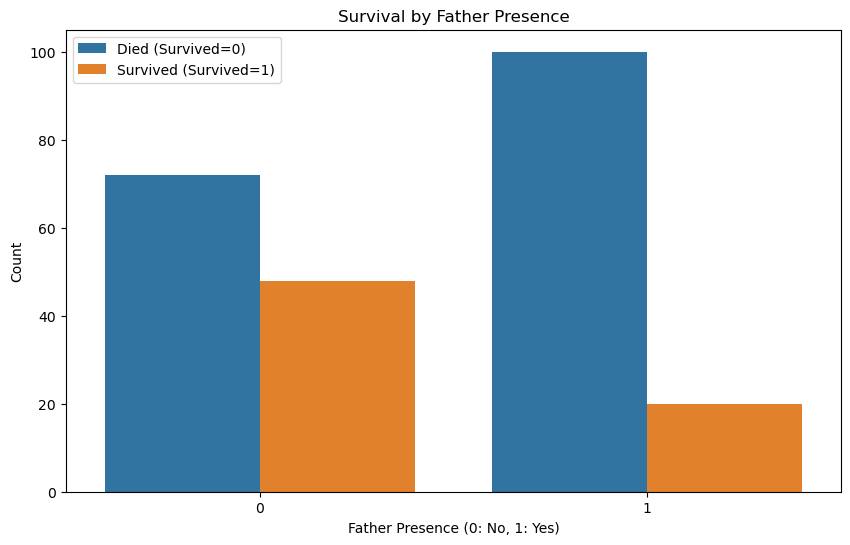

In [20]:
min_samples = min(train['Father'].value_counts())
father_0 = train[train['Father'] == 0].sample(min_samples)
father_1 = train[train['Father'] == 1].sample(min_samples)

# 두 그룹을 합칩니다.
equal_fathers = pd.concat([father_0, father_1])

# 막대그래프를 생성합니다.
plt.figure(figsize=(10, 6))
sns.countplot(x='Father', hue='Survived', data=equal_fathers)

plt.title('Survival by Father Presence')
plt.xlabel('Father Presence (0: No, 1: Yes)')
plt.ylabel('Count')

# 범례 추가
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Died (Survived=0)', 'Survived (Survived=1)'])

plt.show()


그래프에 의하면 아버지 또는 남편의 존재는 생존에 도움을 주지 않습니다


나이가 어릴수록 기동력이 좋아 생존율이 높을거라 생각하므로  Age=0,1,2,3,4 를 가진 승객의 size를 같게 만든 후  각 그룹에 관한 survived를 시각화

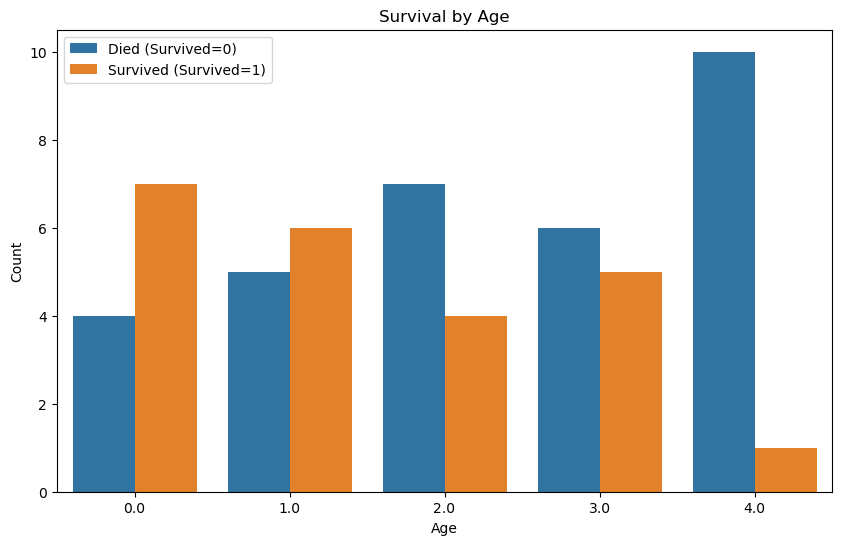

In [21]:
min_samples = min(train['Age'].value_counts())

# 각 'Age' 값별로 동일한 수의 승객을 무작위로 선택합니다.
ages = []
for age in range(5):
    ages.append(train[train['Age'] == age].sample(min_samples))

# 선택한 승객들을 하나의 데이터프레임으로 합칩니다.
equal_ages = pd.concat(ages)

# 막대그래프를 생성합니다.
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Survived', data=equal_ages)

plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# 범례 추가
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Died (Survived=0)', 'Survived (Survived=1)'])

plt.show()

age=2인 그룹을 제외한 나머지 그룹에서 age가 낮은 그룹일 수록 생존률이 높은 것을 볼 수 있습니다.
age=2이 사망률이 높은데는 다른 사정이(Pclass,희생, 등) 있었을 거라 가정해 보겠습니다.

먼저 각Age의 그룹들의 크기를 같게 만든 후 각 그룹들의 Pclass를 보도록 하겠습니다.

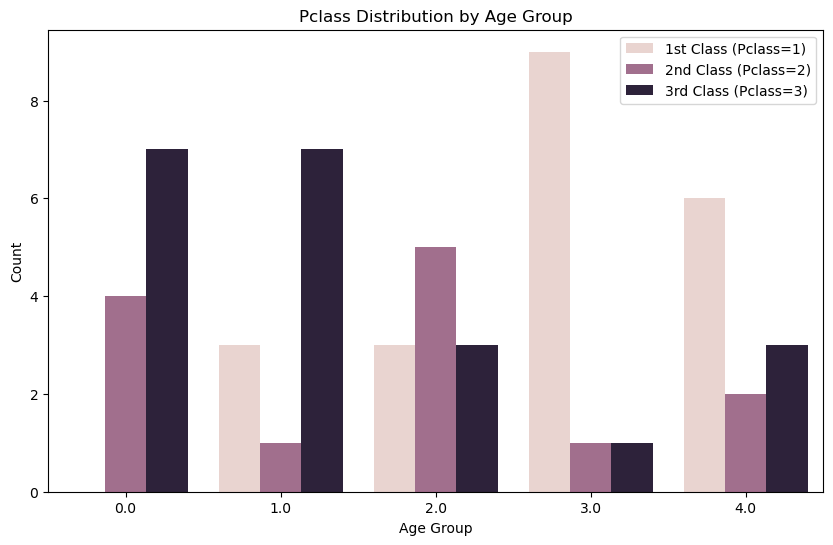

In [22]:
# 'Age' 값별로 최소 승객 수를 찾습니다.
min_samples = min(train['Age'].value_counts())

# 각 'Age' 값별로 동일한 수의 승객을 무작위로 선택합니다.
ages = []
for age in range(5):
    ages.append(train[train['Age'] == age].sample(min_samples))

# 선택한 승객들을 하나의 데이터프레임으로 합칩니다.
equal_ages = pd.concat(ages)

# 막대그래프를 생성합니다.
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Pclass', data=equal_ages)

plt.title('Pclass Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 범례 추가
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['1st Class (Pclass=1)', '2nd Class (Pclass=2)', '3rd Class (Pclass=3)'])

plt.show()

3rd class가 더 생존에 유리했다면 Age=2.0의 그룹이 Age=3.0보다 더 많이 생존 했어야 했는데 그러지 못했다.
1rd class가 더 생존에 유리했다면 Age=3.0이 제일 많이 생존 했어야 했는데 그러지 못했다.

이번엔 Age=2.0의 생존률이 Age=3.0보다 낮은 원인이 다른 승객들을 구하다가 사망한 것이라고 가정해 보겠습니다.
같은 Pclass를 탄 승객을 구하는 것이 다른 Pclass까지 가서 구하는 것 보다 쉬운 일이므로 Age=2.0이 많이 있는 Pclass순(2,1 or 3,3 or 1)으로 생존률이 높을 것이라 가정하겠습니다.

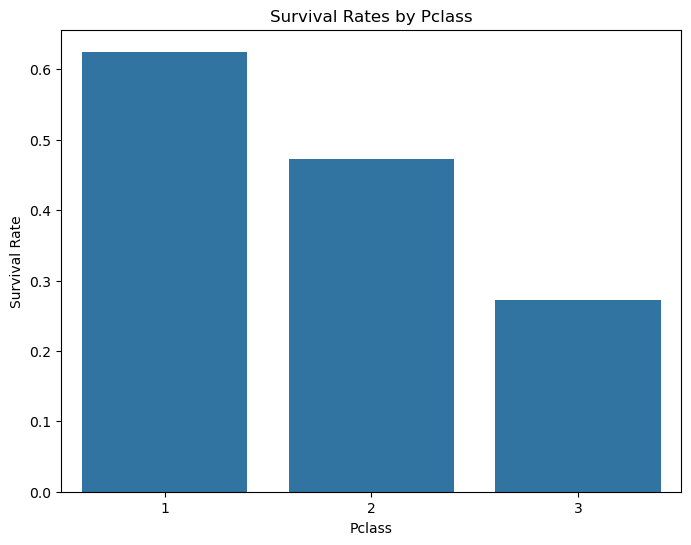

In [25]:
# 각 'Pclass' 그룹별로 동일한 수의 승객을 무작위로 선택합니다.
pclass_samples = []
for pclass in train['Pclass'].unique():
    pclass_samples.append(train[train['Pclass'] == pclass].sample(train['Pclass'].value_counts().min()))
train_sample = pd.concat(pclass_samples)

# 각 'Pclass' 그룹별 생존률을 계산합니다.
pclass_survival_rate = train_sample.groupby('Pclass')['Survived'].mean()

# 데이터프레임 생성
df_pclass = pd.DataFrame(pclass_survival_rate).reset_index()

# 막대그래프를 생성합니다.
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df_pclass)

plt.title('Survival Rates by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

plt.show()

그래프를 보면 Pclass=1이 생존률이 가장 높으므로 가설이 틀렸음을 알 수 있습니다.

Age<=16인 승객들은 가족들과 같이 온 것일까에 관한 가설을 확인해 보도록 하겠습니다.


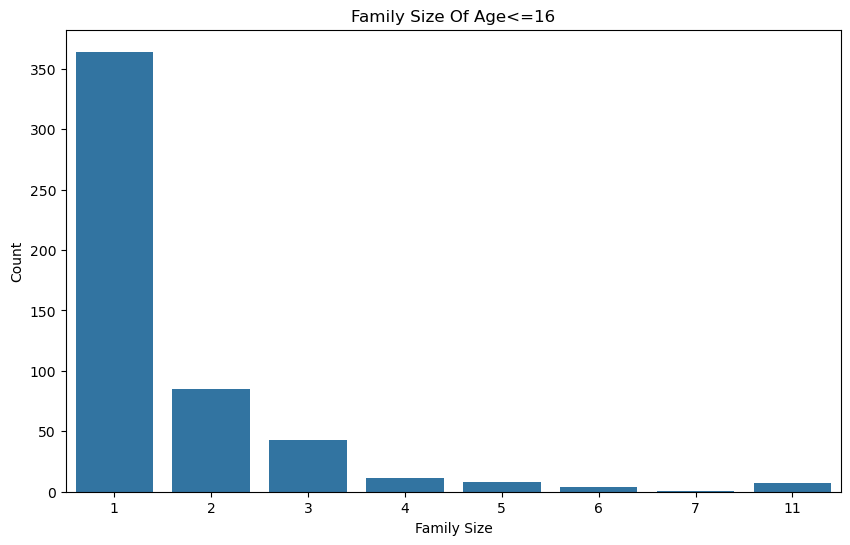

In [26]:
# 'Age=1'인 승객들을 선택합니다.
age_1 = train[train['Age'] == 1]

# 'FamilySize' 분포를 시각화합니다.
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=age_1)

plt.title('Family Size Of Age<=16')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.show()

이 그래프를 보면 age<=16 인 승객들은 혼자 온 사람들이 많은 것을 알 수 있습니다